In [1]:
# ============================================================
# 🚀 YOLOv11m Training on HomeObjects-3K Dataset (FIXED)
# ============================================================

# Step 1: Install dependencies
!pip install -q ultralytics==8.3.0

# Step 2: FIX Ray Tune callback BEFORE importing YOLO
# This must be done before ultralytics imports the callbacks
import sys
from unittest.mock import MagicMock

# Mock the problematic ray.train module
if 'ray' not in sys.modules:
    sys.modules['ray'] = MagicMock()
    sys.modules['ray.train'] = MagicMock()
    sys.modules['ray.train._internal'] = MagicMock()
    sys.modules['ray.train._internal.session'] = MagicMock()
    sys.modules['ray.air'] = MagicMock()
    sys.modules['ray.air.integrations'] = MagicMock()
    sys.modules['ray.air.integrations.wandb'] = MagicMock()

print("✅ Ray modules mocked successfully")

# Step 3: Now import YOLO after mocking
from ultralytics import YOLO, checks
import os
from pathlib import Path

# Step 4: Verify setup
checks()

# Step 5: Dataset setup (if not already present)
dataset_dir = Path("/kaggle/working/datasets")
dataset_dir.mkdir(parents=True, exist_ok=True)

if not (dataset_dir / "homeobjects-3K.zip").exists():
    !wget -q https://github.com/ultralytics/assets/releases/download/v0.0.0/homeobjects-3K.zip -O /kaggle/working/datasets/homeobjects-3K.zip
    !unzip -q /kaggle/working/datasets/homeobjects-3K.zip -d /kaggle/working/datasets/
else:
    print("✅ Dataset already downloaded")


Ultralytics 8.3.0 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6519.8/8062.4 GB disk)


✅ YAML config created


100%|██████████| 38.8M/38.8M [00:00<00:00, 213MB/s]


✅ Model loaded
🚀 Starting training...
New https://pypi.org/project/ultralytics/8.3.206 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.0 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=/kaggle/working/HomeObjects-3K.yaml, epochs=100, time=None, patience=15, batch=8, imgsz=768, save=True, save_period=-1, cache=False, device=0, workers=2, project=/kaggle/working/runs, name=yolo11m_homeobjects3k_highperf, exist_ok=True, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_n

100%|██████████| 755k/755k [00:00<00:00, 17.1MB/s]
E0000 00:00:1759913304.481940      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759913304.600190      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Overriding model.yaml nc=80 with nc=12

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytic

100%|██████████| 6.25M/6.25M [00:00<00:00, 81.8MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/datasets/labels/train... 2285 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2285/2285 [00:01<00:00, 1434.08it/s]


train: New cache created: /kaggle/working/datasets/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/ultralytics/data/augment.py:1850: UserWarning: Argument(s) 'quality_lower' are not valid for transform ImageCompression
  A.ImageCompression(quality_lower=75, p=0.0),
val: Scanning /kaggle/working/datasets/labels/val... 404 images, 0 backgrounds, 0 corrupt: 100%|██████████| 404/404 [00:00<00:00, 1515.13it/s]

val: New cache created: /kaggle/working/datasets/labels/val.cache


Plotting labels to /kaggle/working/runs/yolo11m_homeobjects3k_highperf/labels.jpg... 
optimizer: SGD(lr=0.001, momentum=0.937) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 768 train, 768 val
Using 2 dataloader workers
Logging results to /kaggle/working/runs/yolo11m_homeobjects3k_highperf
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      6.45G      1.203      2.633       1.33         53        768: 100%|██████████| 286/286 [01:58<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.35it/s]


                   all        404       3470      0.591      0.448      0.447       0.32

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      6.35G      1.075      1.404      1.211         72        768: 100%|██████████| 286/286 [01:58<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.86it/s]

                   all        404       3470      0.652      0.641      0.653      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      6.33G      1.056      1.203      1.181        151        768: 100%|██████████| 286/286 [01:58<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.99it/s]

                   all        404       3470      0.659      0.673      0.711      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      6.26G      1.037      1.094      1.166         62        768: 100%|██████████| 286/286 [01:58<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.01it/s]

                   all        404       3470      0.659      0.713      0.724      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      6.28G      1.014      1.016      1.154         79        768: 100%|██████████| 286/286 [01:58<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.01it/s]

                   all        404       3470      0.691      0.686      0.716      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      6.31G     0.9954     0.9638      1.142         79        768: 100%|██████████| 286/286 [01:58<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.05it/s]

                   all        404       3470      0.698      0.728      0.747      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      6.36G     0.9853     0.9321      1.131        107        768: 100%|██████████| 286/286 [01:58<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.94it/s]

                   all        404       3470      0.685       0.72      0.731       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      6.29G     0.9786      0.898      1.122         71        768: 100%|██████████| 286/286 [01:58<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.97it/s]

                   all        404       3470      0.737        0.7      0.757      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      6.33G     0.9678      0.866      1.119         83        768: 100%|██████████| 286/286 [01:59<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.86it/s]

                   all        404       3470      0.705      0.712      0.759      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      6.28G     0.9589     0.8504      1.113         74        768: 100%|██████████| 286/286 [01:58<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.98it/s]

                   all        404       3470       0.71      0.704       0.75      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100       6.3G     0.9471     0.8176      1.104         89        768: 100%|██████████| 286/286 [01:58<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.92it/s]

                   all        404       3470      0.728      0.699      0.737      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      6.31G     0.9441     0.8048      1.098         97        768: 100%|██████████| 286/286 [01:58<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.96it/s]

                   all        404       3470       0.67      0.748      0.749      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      6.39G     0.9349      0.782      1.088         82        768: 100%|██████████| 286/286 [01:58<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.99it/s]

                   all        404       3470      0.719      0.707      0.752      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      6.34G     0.9326     0.7643      1.092         77        768: 100%|██████████| 286/286 [01:58<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.01it/s]

                   all        404       3470      0.731      0.719      0.736      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      6.39G      0.925       0.75      1.097         69        768: 100%|██████████| 286/286 [01:58<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.02it/s]

                   all        404       3470      0.735      0.708      0.755      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      6.24G     0.9182     0.7412      1.086         47        768: 100%|██████████| 286/286 [01:58<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.03it/s]

                   all        404       3470      0.765      0.683      0.775      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      6.32G     0.9116     0.7315      1.081        106        768: 100%|██████████| 286/286 [01:58<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.04it/s]

                   all        404       3470      0.752      0.708      0.774      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      6.39G     0.9077     0.7125      1.076         75        768: 100%|██████████| 286/286 [01:58<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.95it/s]

                   all        404       3470       0.75      0.697      0.773      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      6.29G     0.8971     0.7064      1.073         55        768: 100%|██████████| 286/286 [01:58<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.01it/s]

                   all        404       3470      0.764      0.718      0.777      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      6.36G     0.8982     0.7029      1.078         61        768: 100%|██████████| 286/286 [01:58<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.99it/s]

                   all        404       3470      0.728      0.724       0.78      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      6.31G     0.8889     0.6782      1.069        118        768: 100%|██████████| 286/286 [01:58<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.94it/s]

                   all        404       3470      0.807       0.67      0.777      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      6.33G      0.888     0.6753      1.066         74        768: 100%|██████████| 286/286 [01:58<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.99it/s]

                   all        404       3470       0.77      0.729       0.78      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      6.38G     0.8829     0.6641      1.063         60        768: 100%|██████████| 286/286 [01:58<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.99it/s]

                   all        404       3470      0.774      0.713      0.769      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      6.31G     0.8769      0.662      1.061        111        768: 100%|██████████| 286/286 [01:58<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.95it/s]

                   all        404       3470      0.738      0.713      0.772      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      6.31G     0.8642     0.6419      1.058        121        768: 100%|██████████| 286/286 [01:58<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.00it/s]

                   all        404       3470      0.728      0.736      0.774      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      6.44G     0.8632     0.6336      1.053        106        768: 100%|██████████| 286/286 [01:58<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.00it/s]

                   all        404       3470      0.768       0.71       0.78      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      6.31G     0.8615     0.6335      1.048        174        768: 100%|██████████| 286/286 [01:58<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.98it/s]

                   all        404       3470      0.765      0.735      0.782      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      6.29G     0.8513     0.6149      1.035         98        768: 100%|██████████| 286/286 [01:58<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.97it/s]

                   all        404       3470      0.779      0.709      0.778      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      6.31G     0.8492     0.6118      1.042         53        768: 100%|██████████| 286/286 [01:58<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.97it/s]

                   all        404       3470      0.779      0.704      0.772      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      6.31G     0.8374      0.596      1.039         90        768: 100%|██████████| 286/286 [01:58<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.00it/s]

                   all        404       3470      0.746      0.721      0.773      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      6.32G     0.8382     0.6024      1.034         78        768: 100%|██████████| 286/286 [01:58<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.01it/s]

                   all        404       3470      0.769      0.709      0.777      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      6.38G     0.8355     0.5914      1.034        104        768: 100%|██████████| 286/286 [01:58<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.01it/s]

                   all        404       3470      0.788      0.704      0.781      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      6.28G     0.8253     0.5795      1.029         99        768: 100%|██████████| 286/286 [01:58<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.99it/s]

                   all        404       3470      0.771      0.733      0.782      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      6.35G     0.8272     0.5813      1.031        113        768: 100%|██████████| 286/286 [01:58<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.88it/s]

                   all        404       3470      0.772      0.709      0.785      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      6.39G     0.8207     0.5686      1.025         37        768: 100%|██████████| 286/286 [01:59<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.91it/s]

                   all        404       3470      0.753       0.74       0.77      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      6.38G      0.816     0.5629      1.028         75        768: 100%|██████████| 286/286 [01:58<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.96it/s]

                   all        404       3470      0.774      0.725       0.77      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      6.33G     0.8127     0.5612      1.026         82        768: 100%|██████████| 286/286 [01:58<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.98it/s]

                   all        404       3470       0.76      0.729      0.769      0.569
EarlyStopping: Training stopped early as no improvement observed in last 15 epochs. Best results observed at epoch 22, best model saved as best.pt.
To update EarlyStopping(patience=15) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



37 epochs completed in 1.304 hours.
Optimizer stripped from /kaggle/working/runs/yolo11m_homeobjects3k_highperf/weights/last.pt, 40.5MB
Optimizer stripped from /kaggle/working/runs/yolo11m_homeobjects3k_highperf/weights/best.pt, 40.5MB

Validating /kaggle/working/runs/yolo11m_homeobjects3k_highperf/weights/best.pt...
Ultralytics 8.3.0 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 303 layers, 20,039,284 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.82it/s]


                   all        404       3470       0.76      0.718      0.786      0.598
                   bed         22         22       0.79      0.857       0.88       0.66
                  sofa        286        398      0.847      0.807      0.909       0.73
                 chair        154        305      0.753      0.774      0.812      0.609
                 table        300        469      0.806      0.787      0.865      0.668
                  lamp        199        304      0.681      0.536      0.625      0.401
                    tv         51         54      0.839       0.77      0.851      0.709
                laptop          3          4      0.683          1      0.995      0.895
              wardrobe         85        109      0.679      0.563      0.652      0.497
                window        162        371      0.587      0.503      0.567      0.361
                  door         58         85       0.75      0.482      0.597      0.437
          potted plan

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 27.6ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to /kaggle/working/runs/yolo11m_homeobjects3k_highperf

✅ Training completed successfully!

📊 Running validation...
Ultralytics 8.3.0 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 303 layers, 20,039,284 parameters, 0 gradients, 67.7 GFLOPs


val: Scanning /kaggle/working/datasets/labels/val.cache... 404 images, 0 backgrounds, 0 corrupt: 100%|██████████| 404/404 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:28<00:00,  1.79it/s]


                   all        404       3470      0.765      0.717      0.786      0.598
                   bed         22         22      0.788      0.845      0.871      0.651
                  sofa        286        398      0.854      0.807      0.913      0.737
                 chair        154        305      0.752      0.764      0.811      0.606
                 table        300        469      0.805      0.791      0.866       0.67
                  lamp        199        304      0.694      0.539      0.622      0.406
                    tv         51         54      0.838      0.764      0.849      0.705
                laptop          3          4      0.689          1      0.995      0.895
              wardrobe         85        109      0.701      0.587      0.664      0.499
                window        162        371      0.583      0.496       0.57      0.362
                  door         58         85      0.771      0.482      0.599      0.437
          potted plan

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 64.5ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to /kaggle/working/runs/yolo11m_homeobjects3k_highperf

mAP50-95: 0.598
mAP50: 0.786
mAP75: 0.694

📊 Displaying training results...

Training Results:


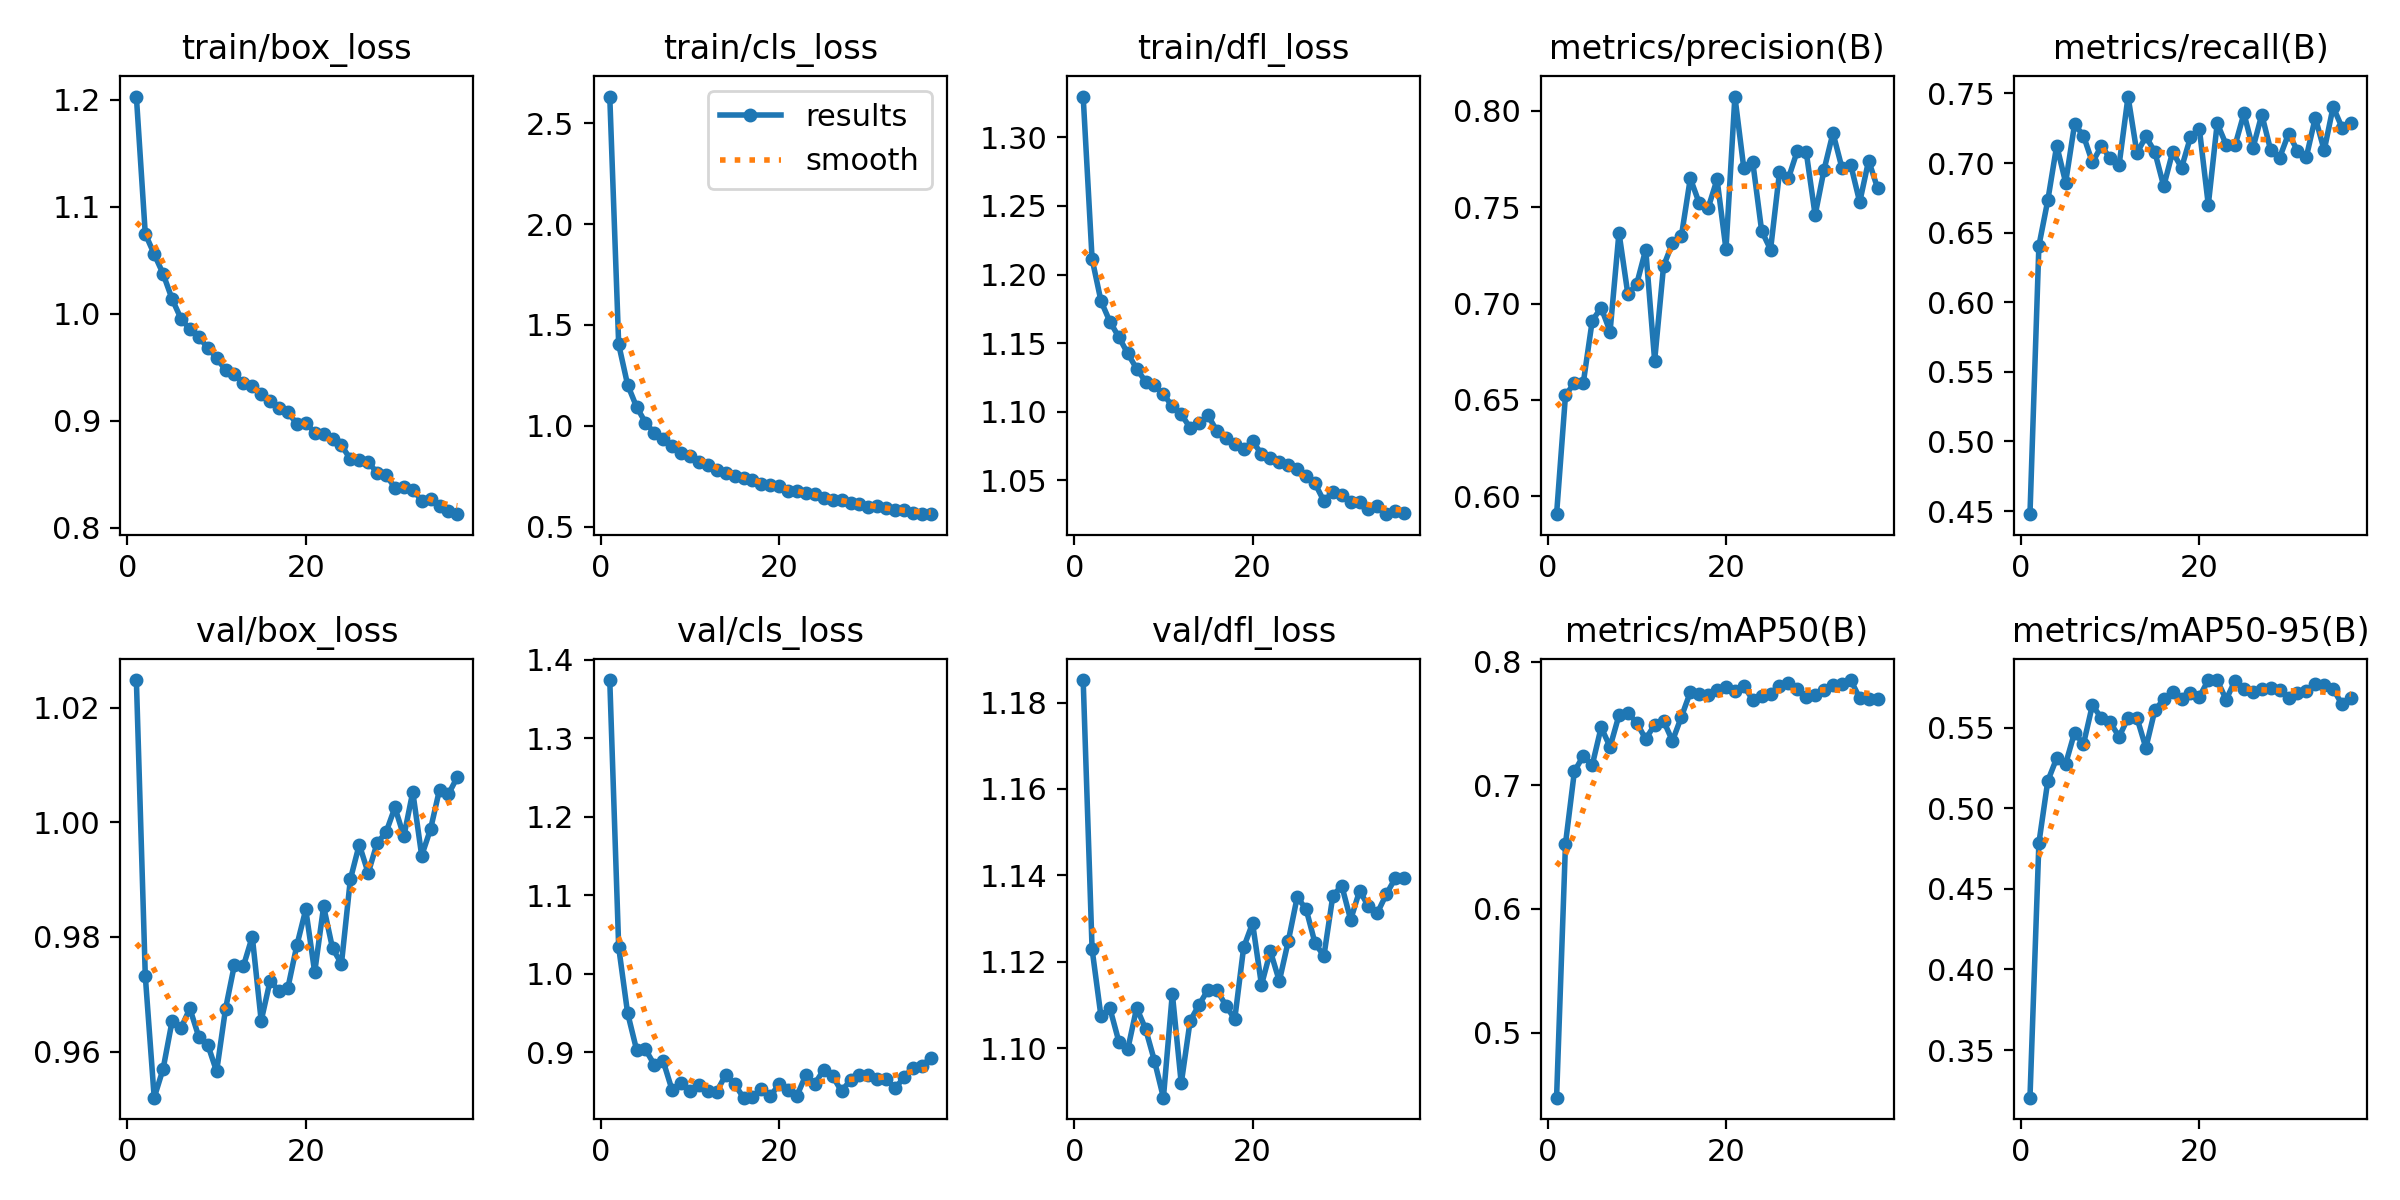


Confusion Matrix:


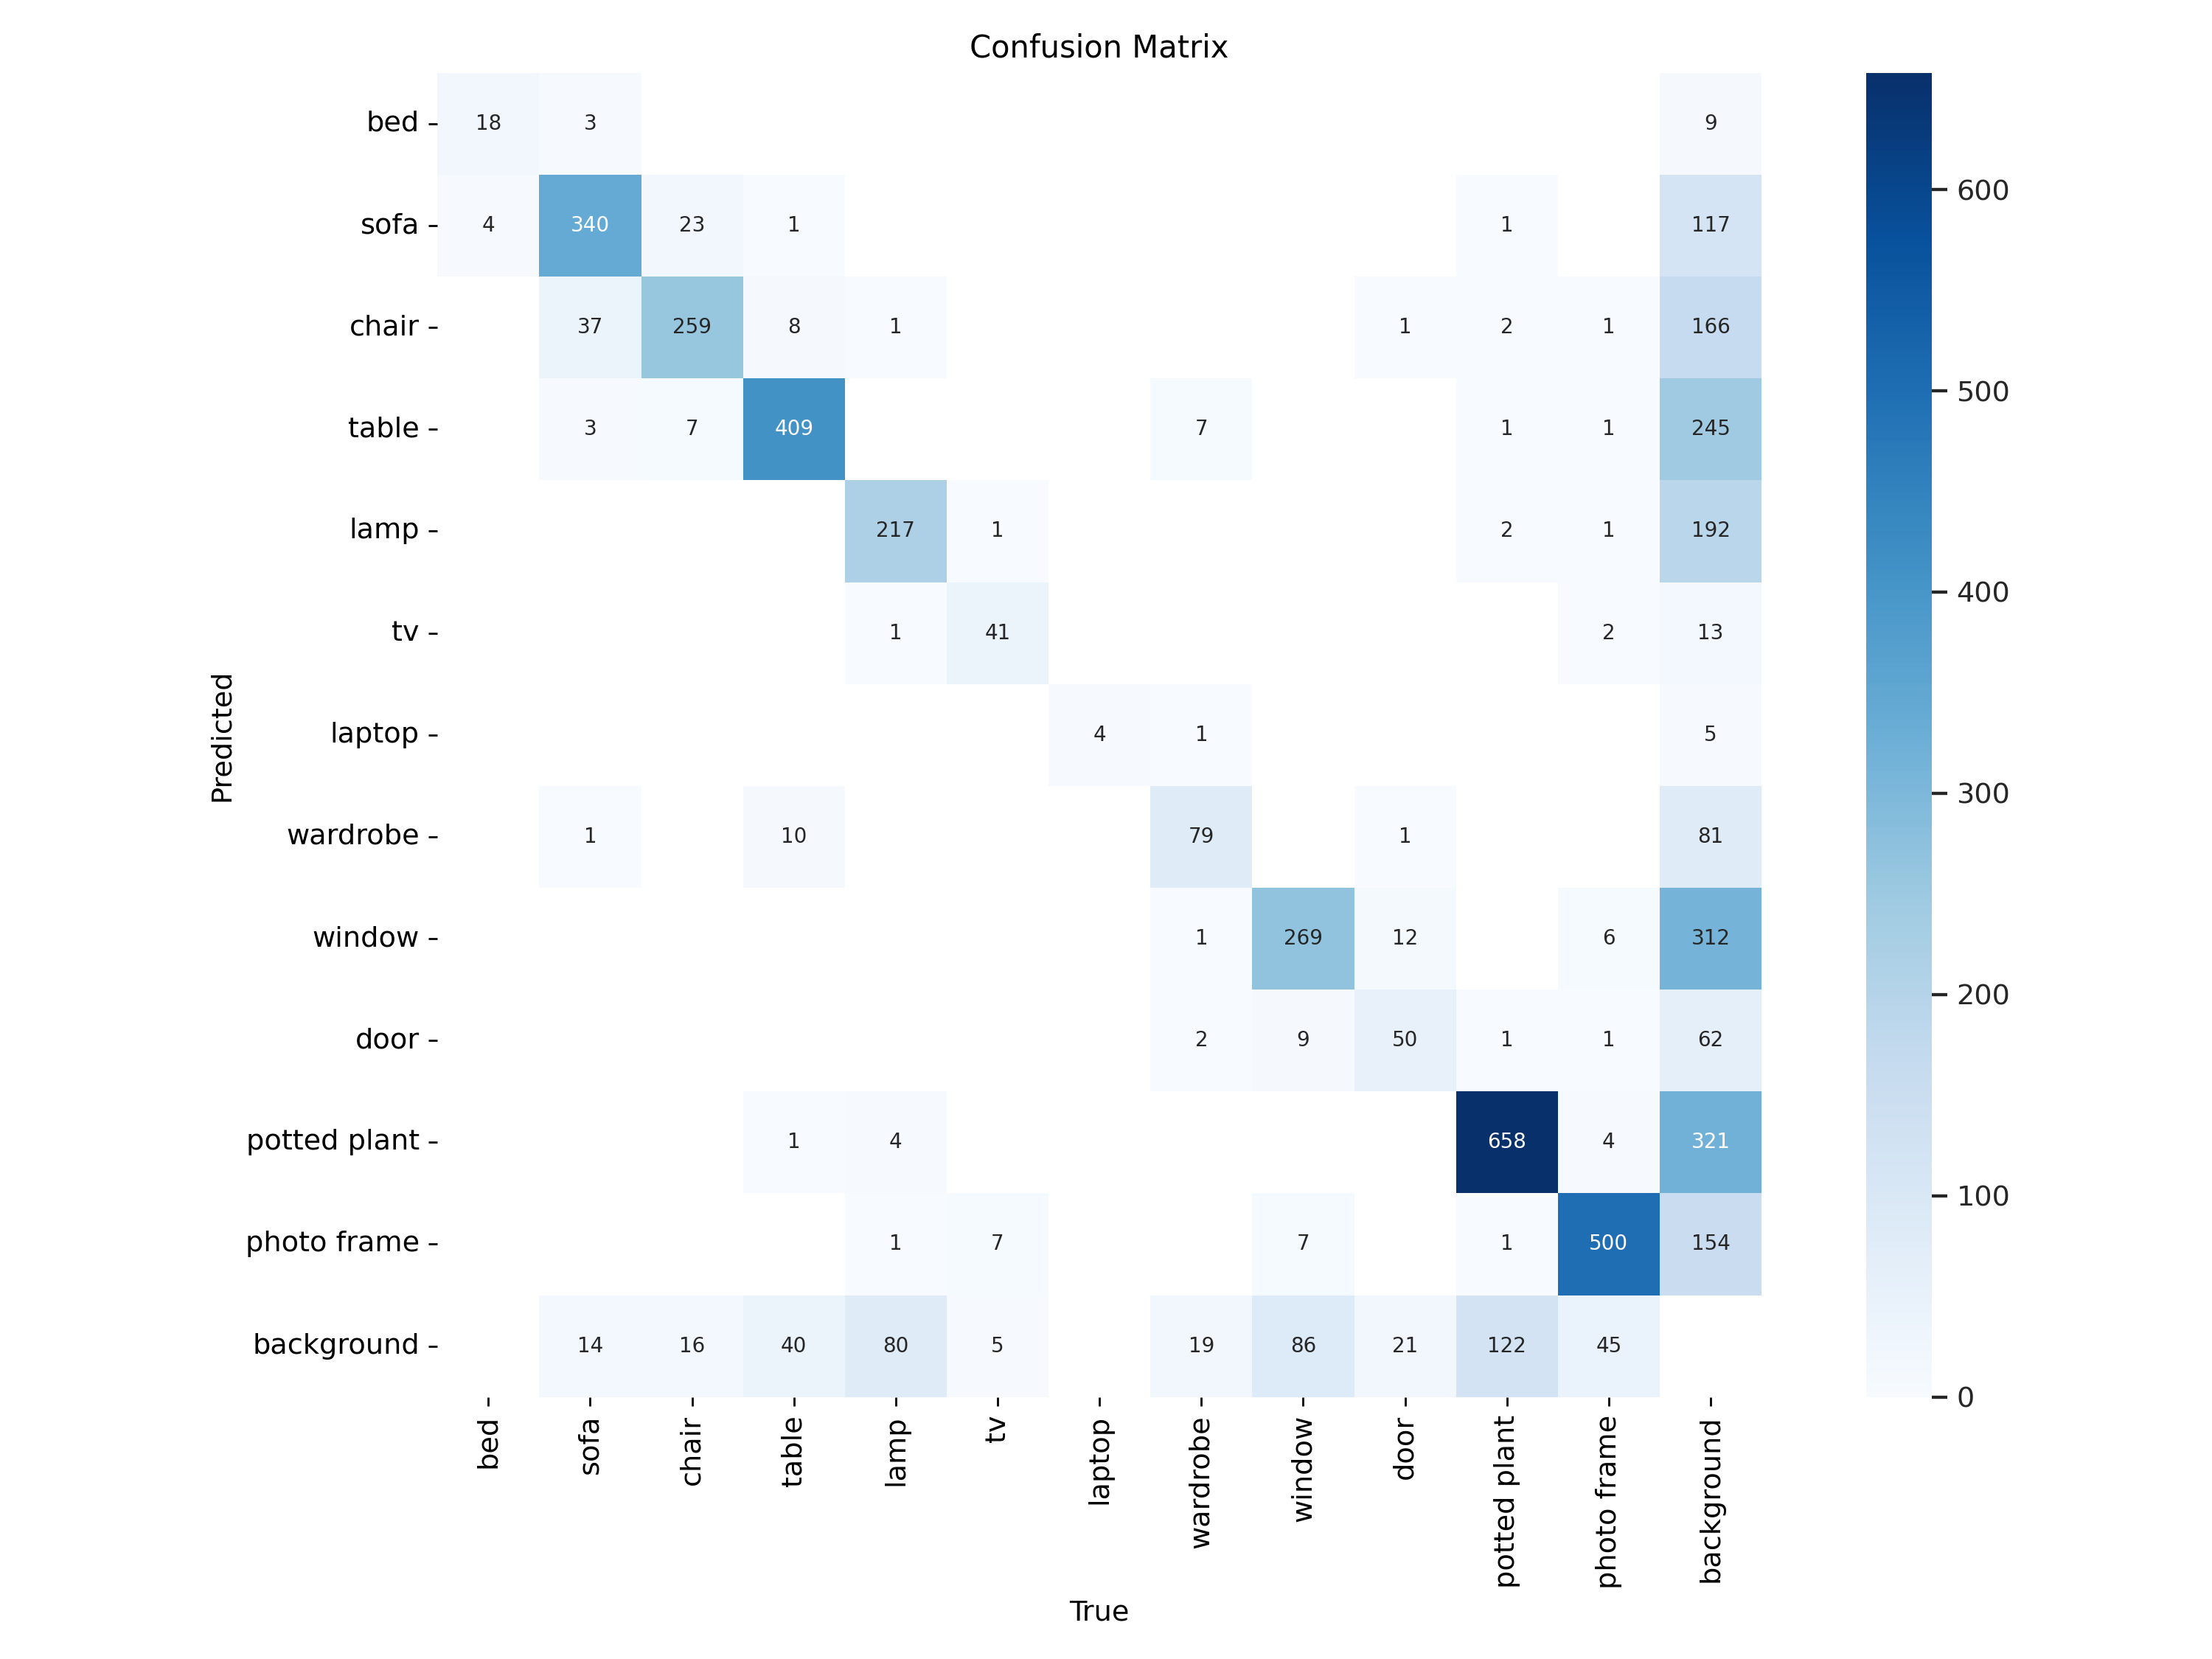


F1 Curve:


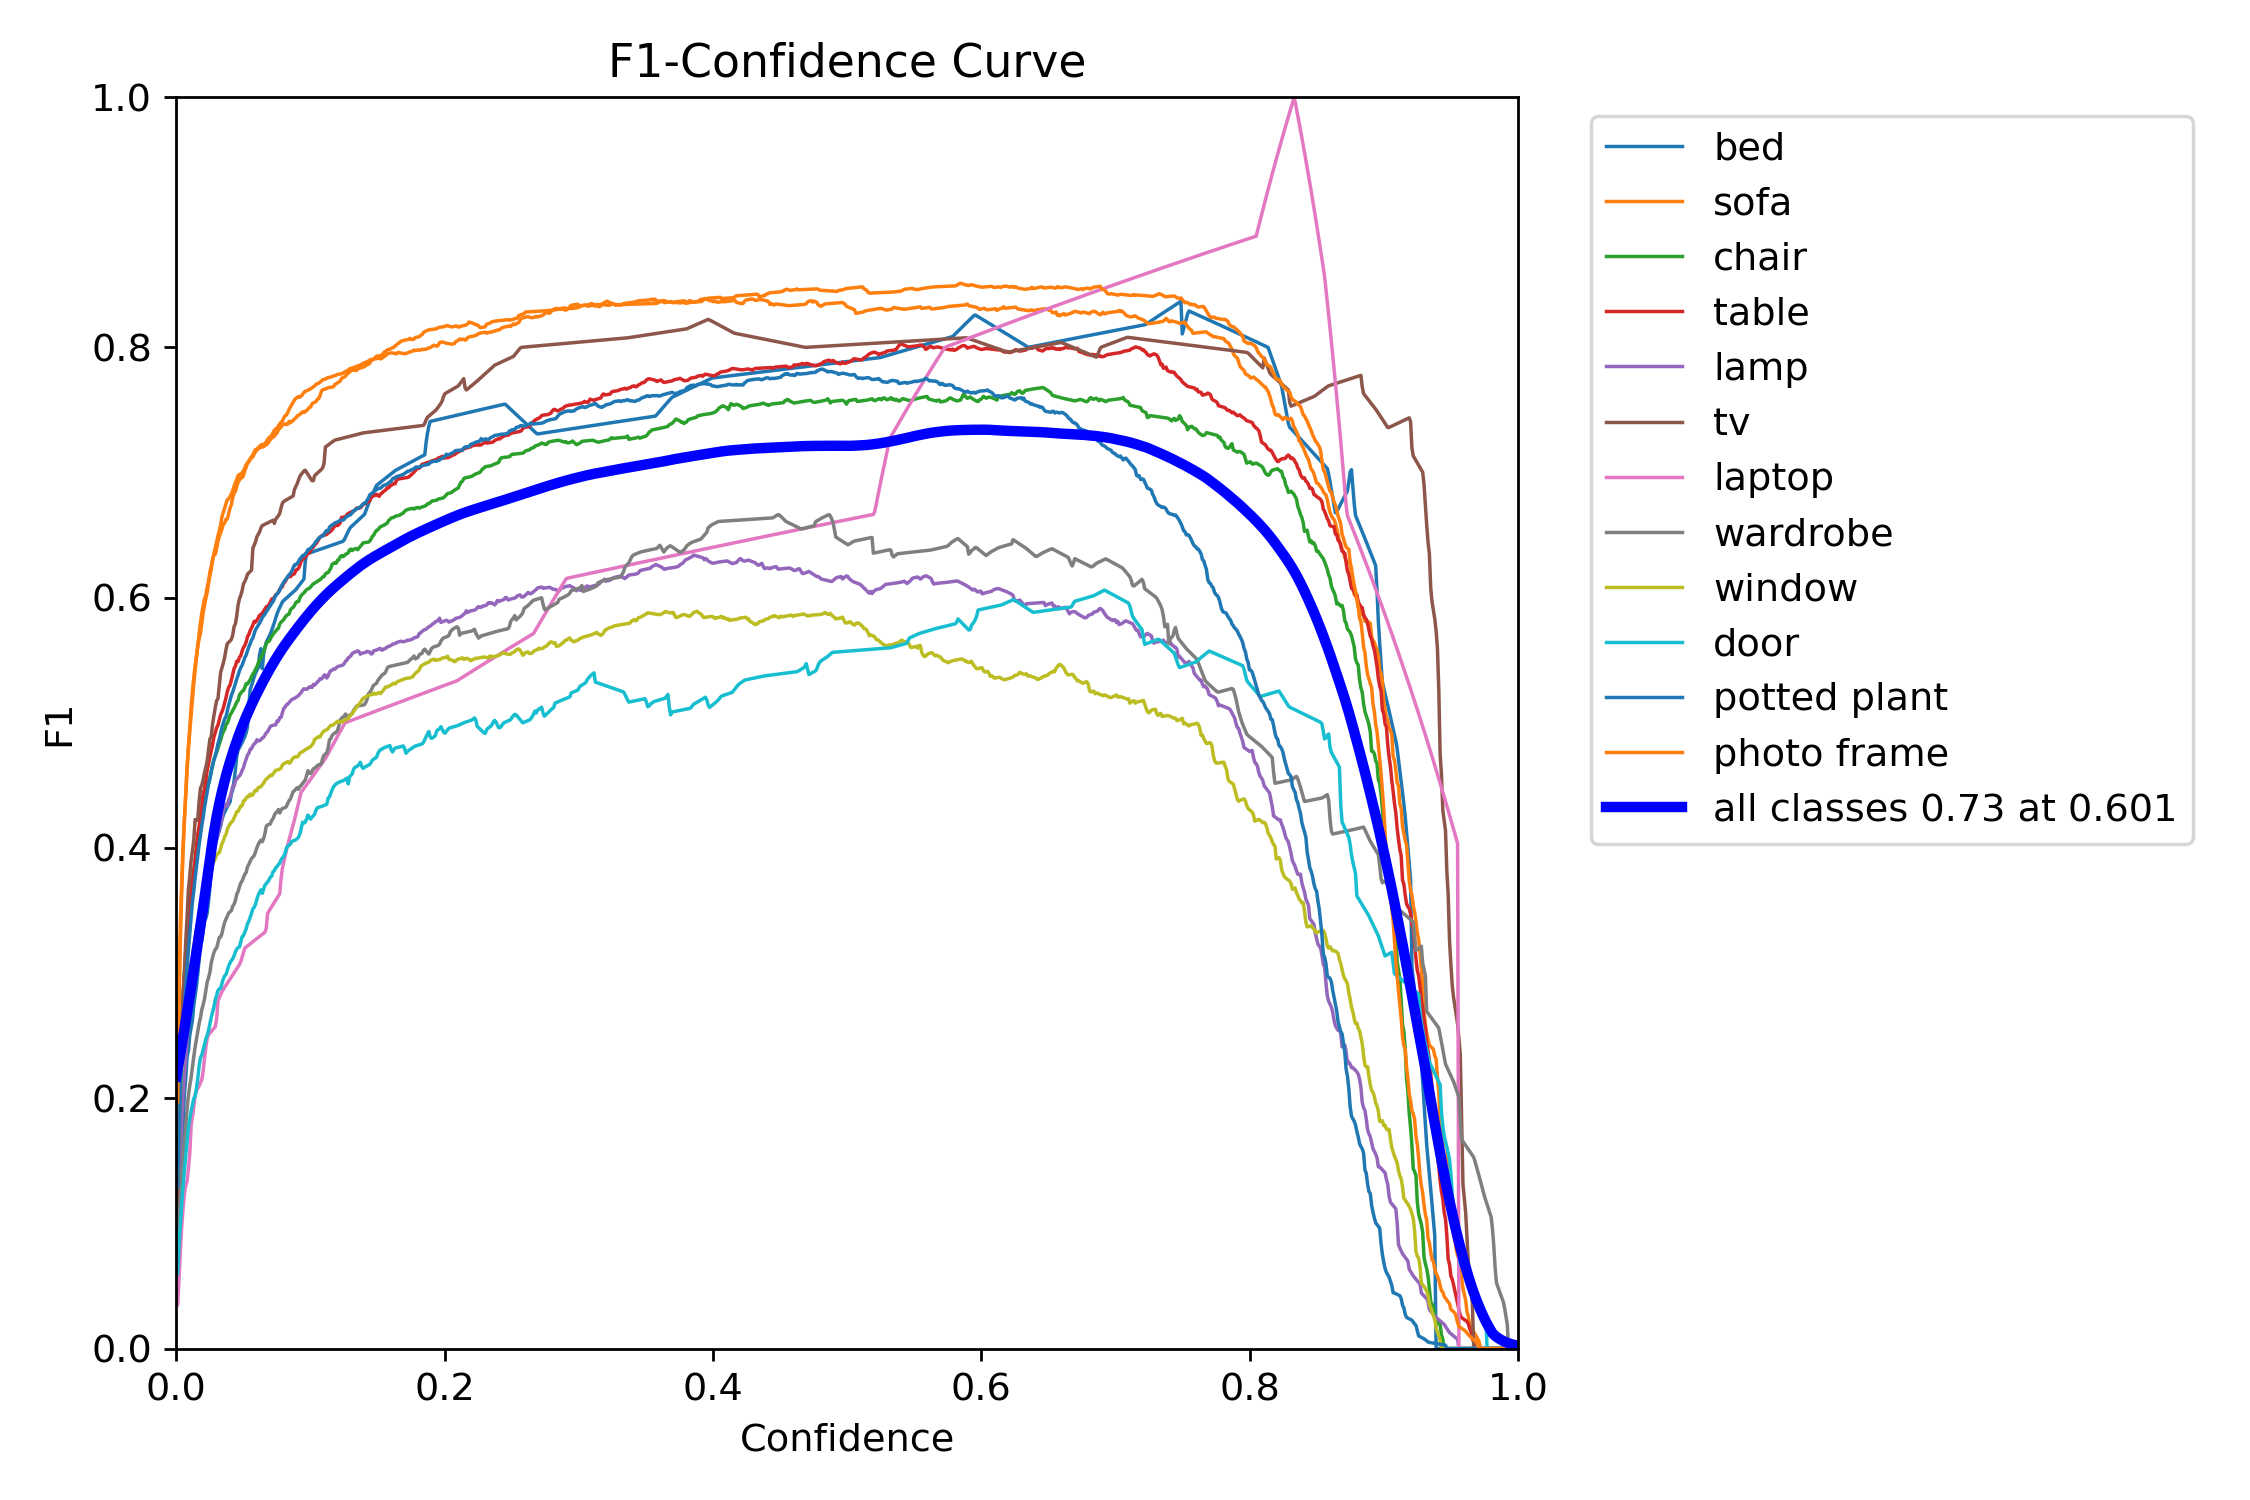


PR Curve:


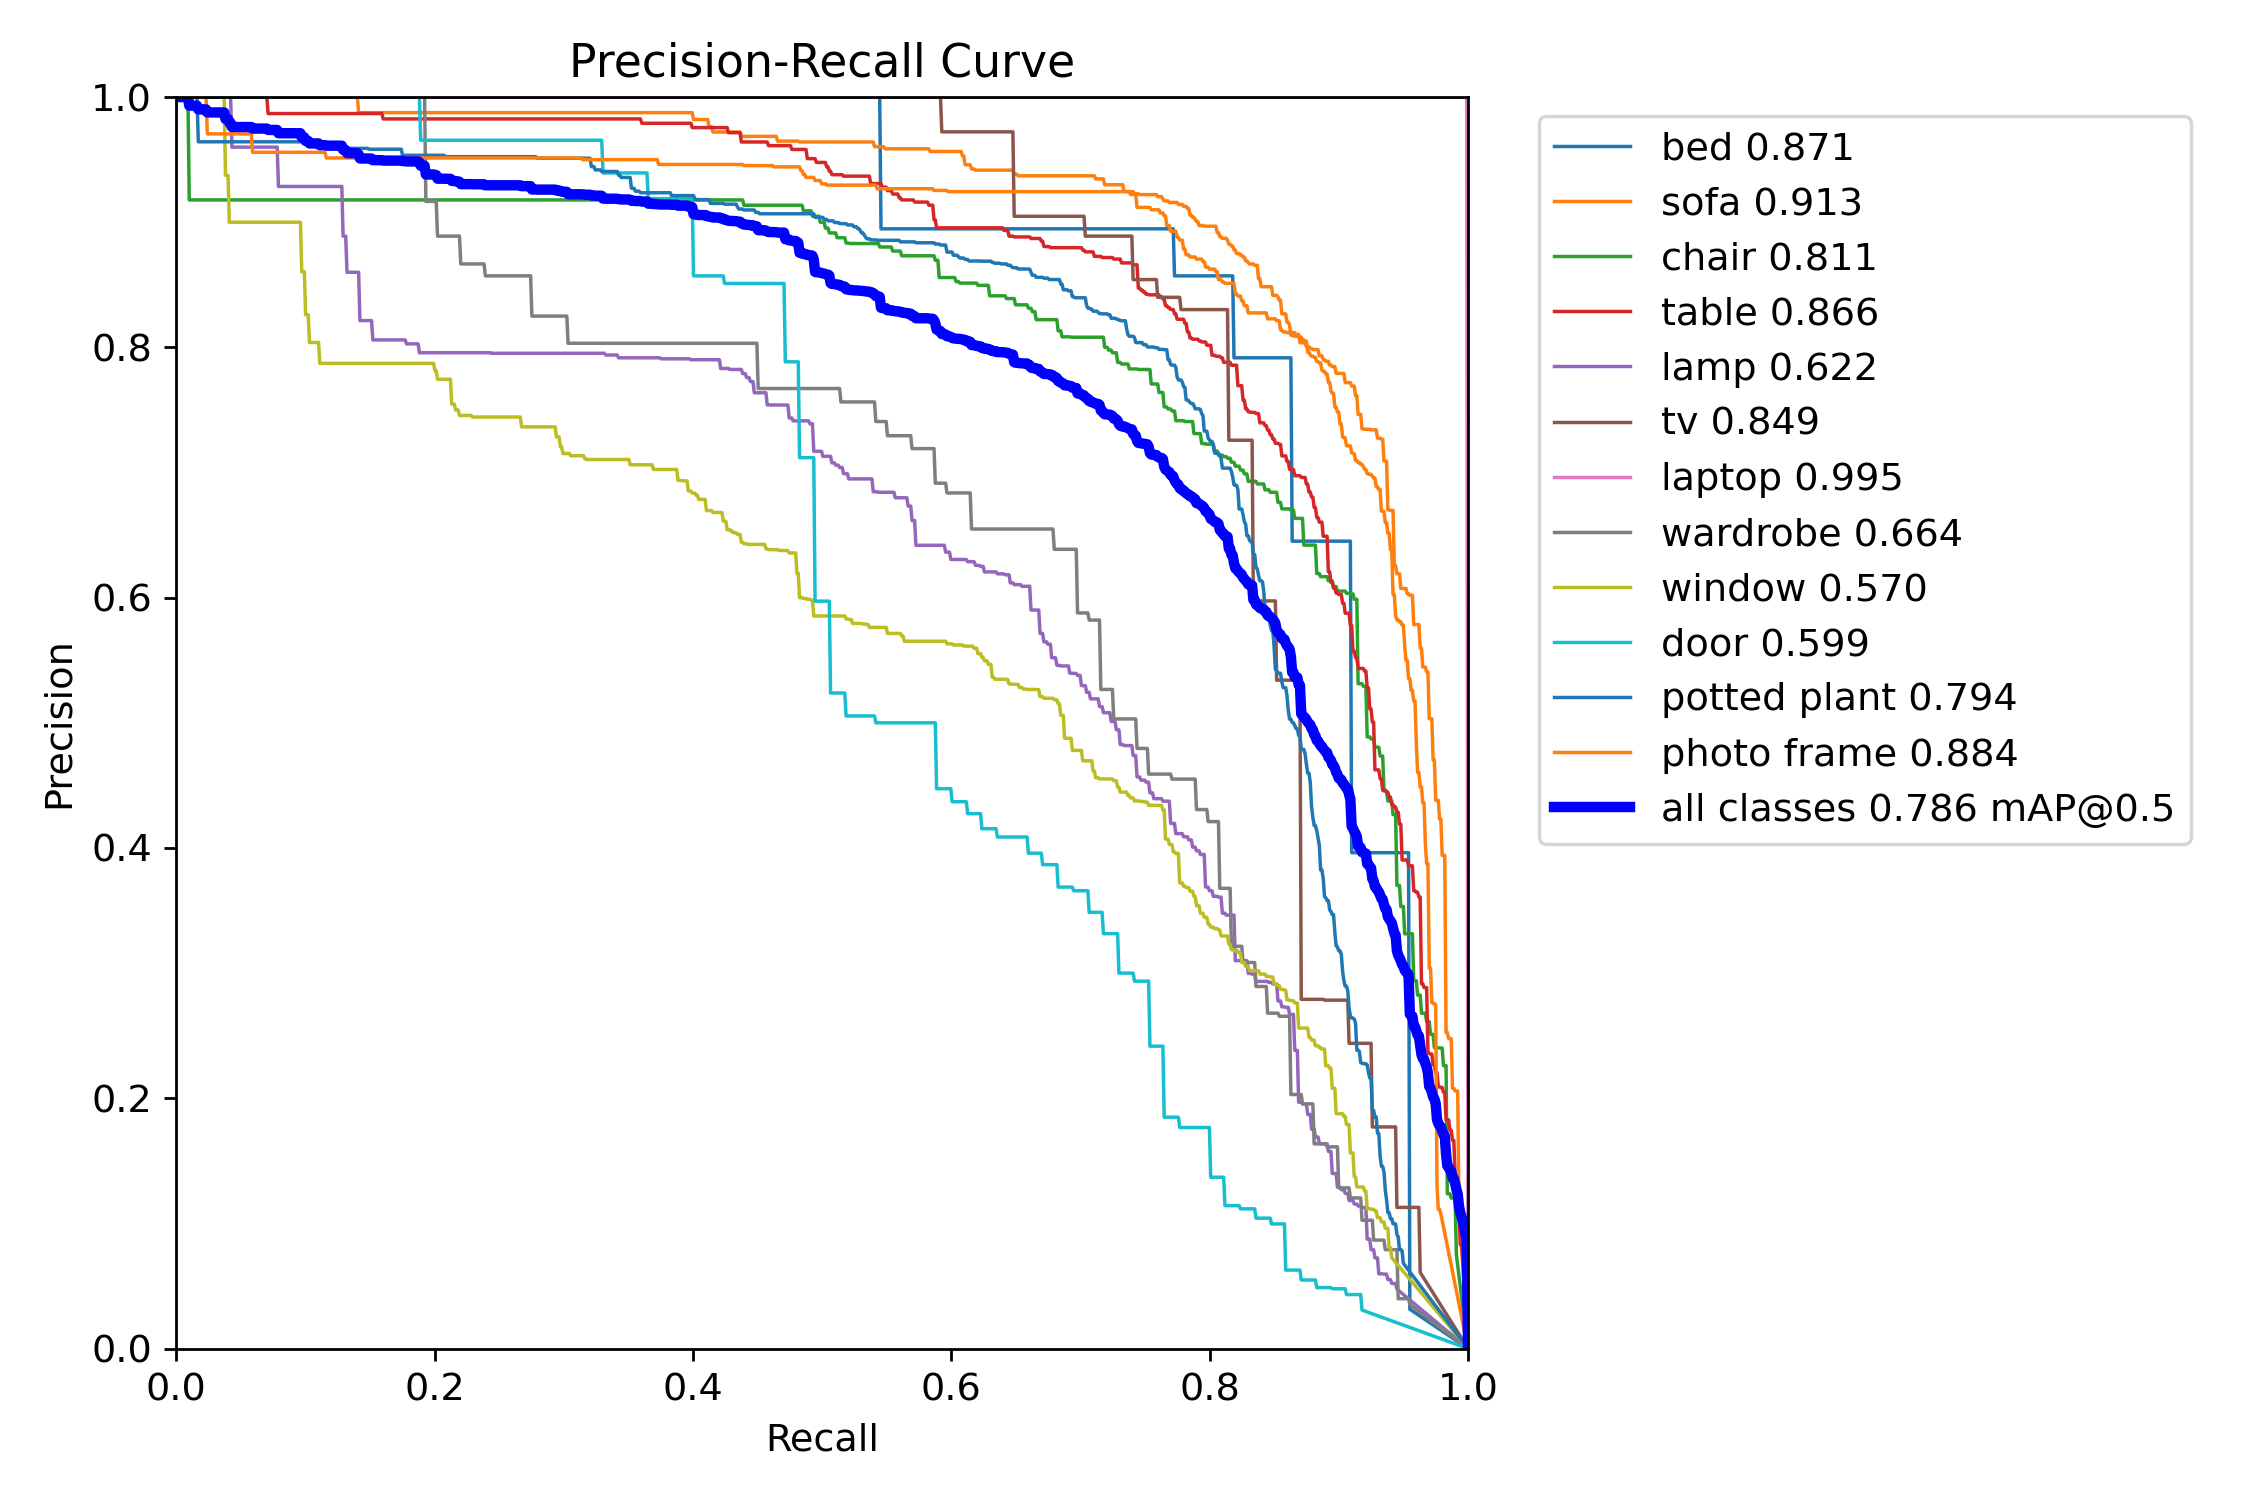


P Curve:


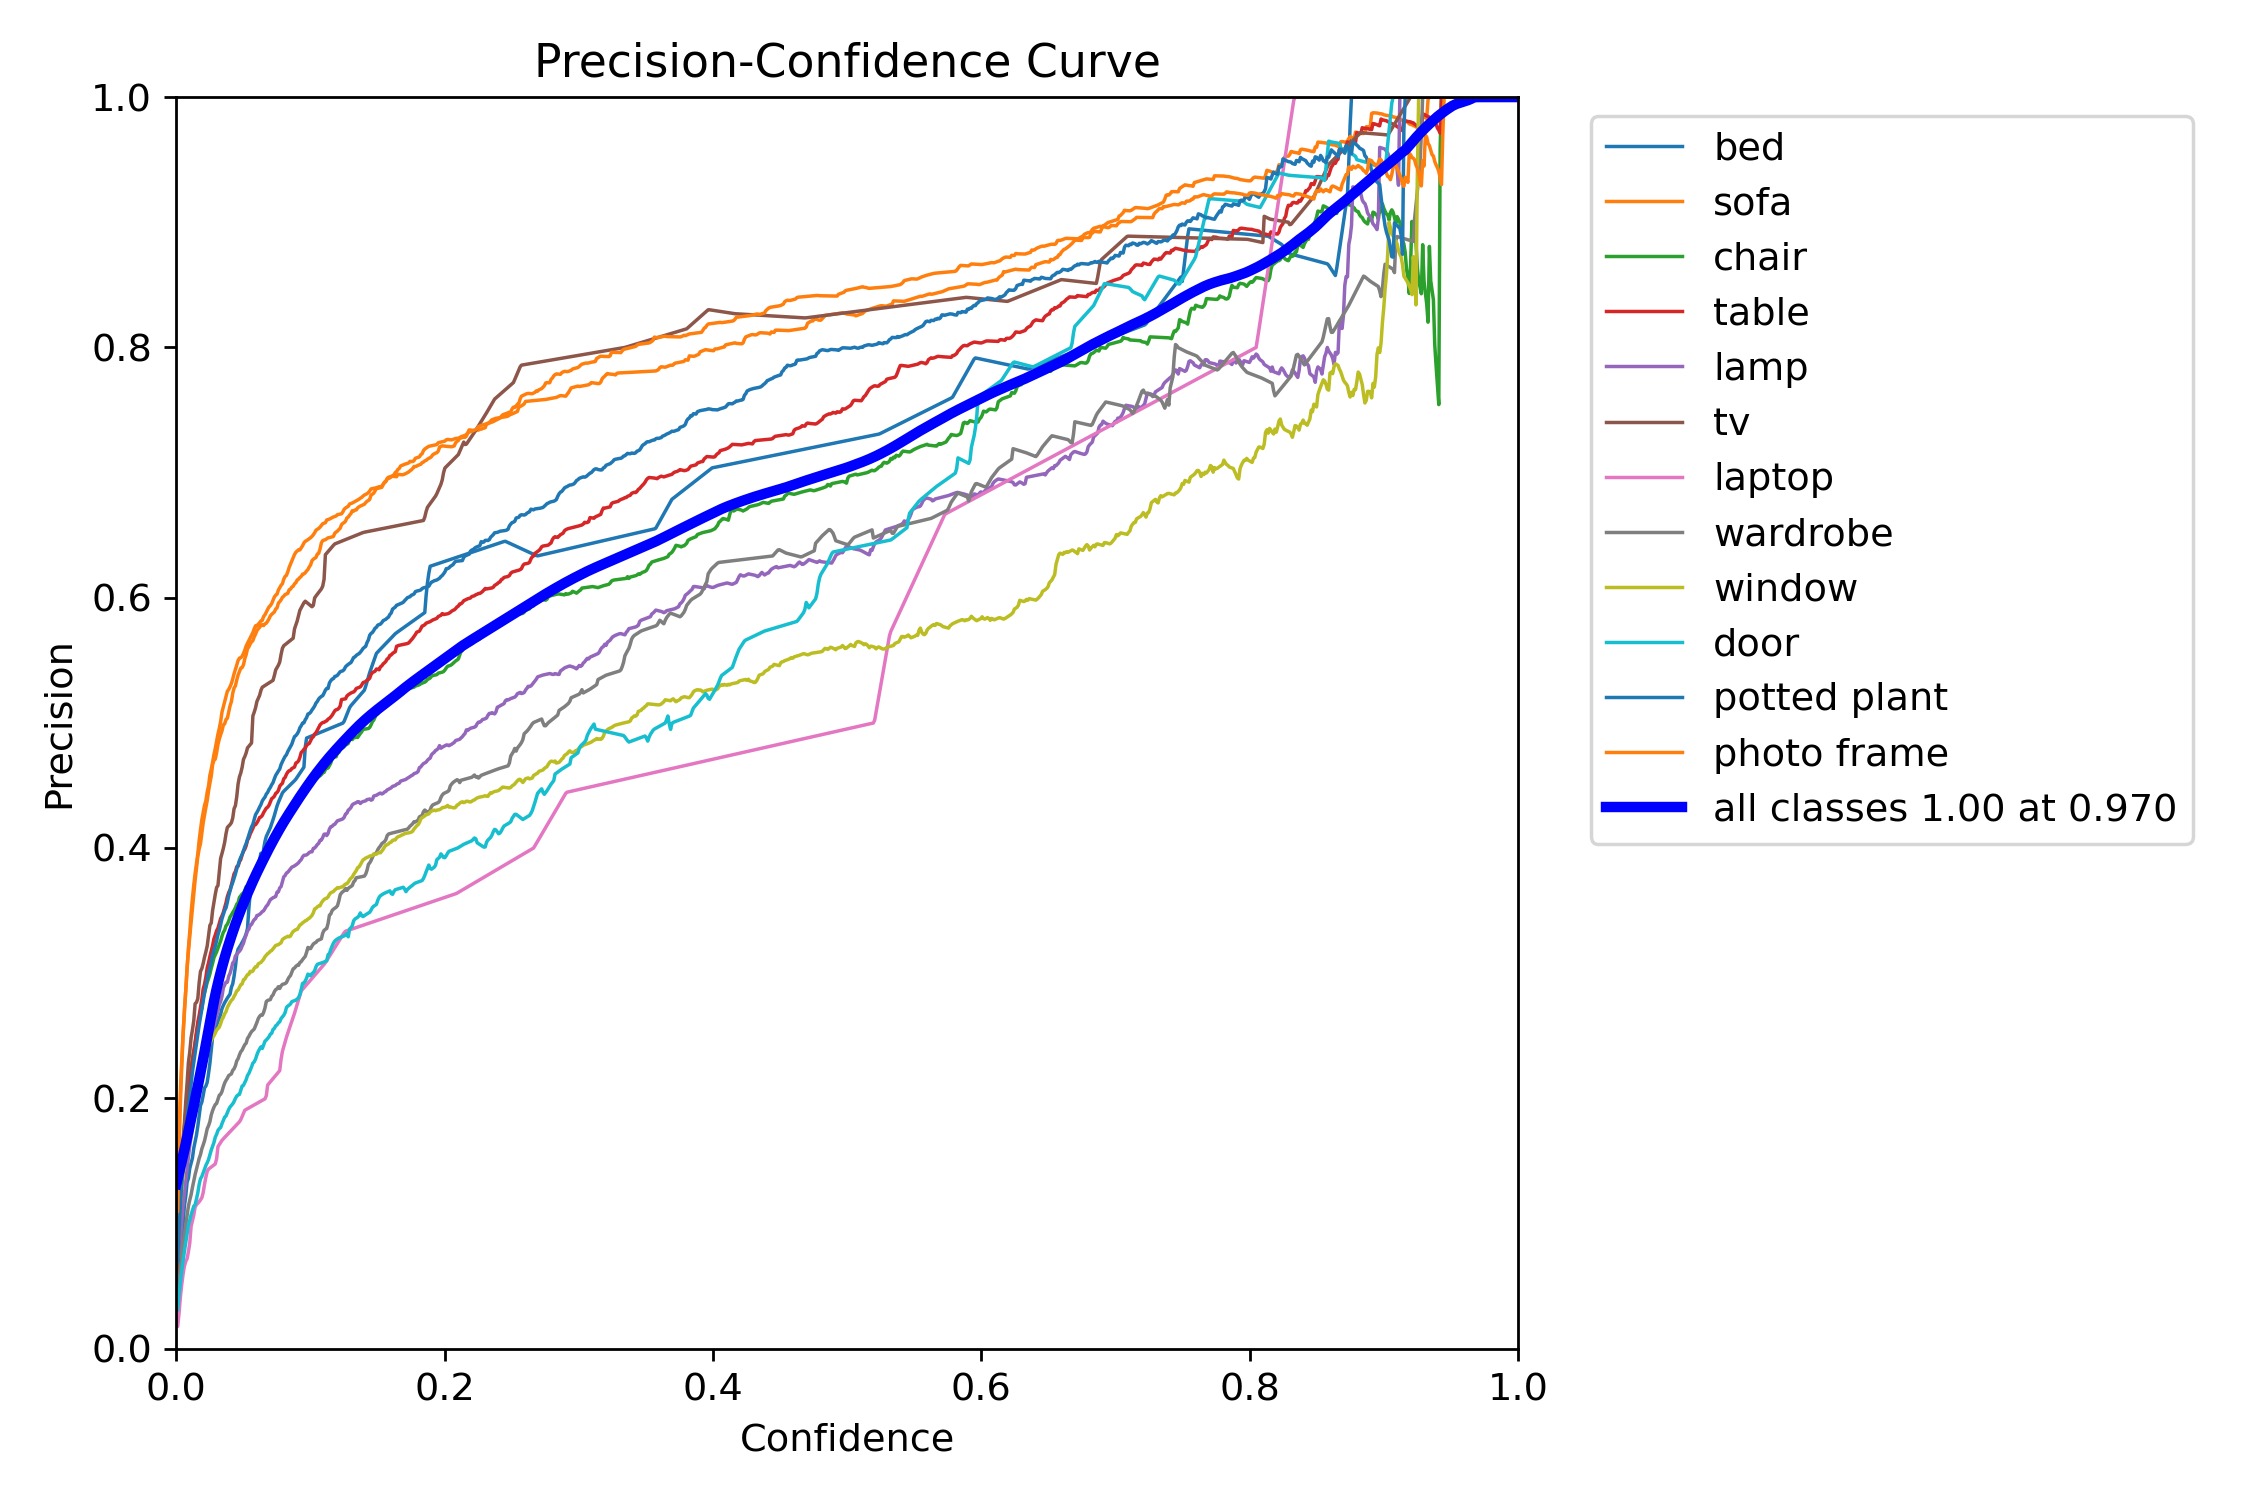


R Curve:


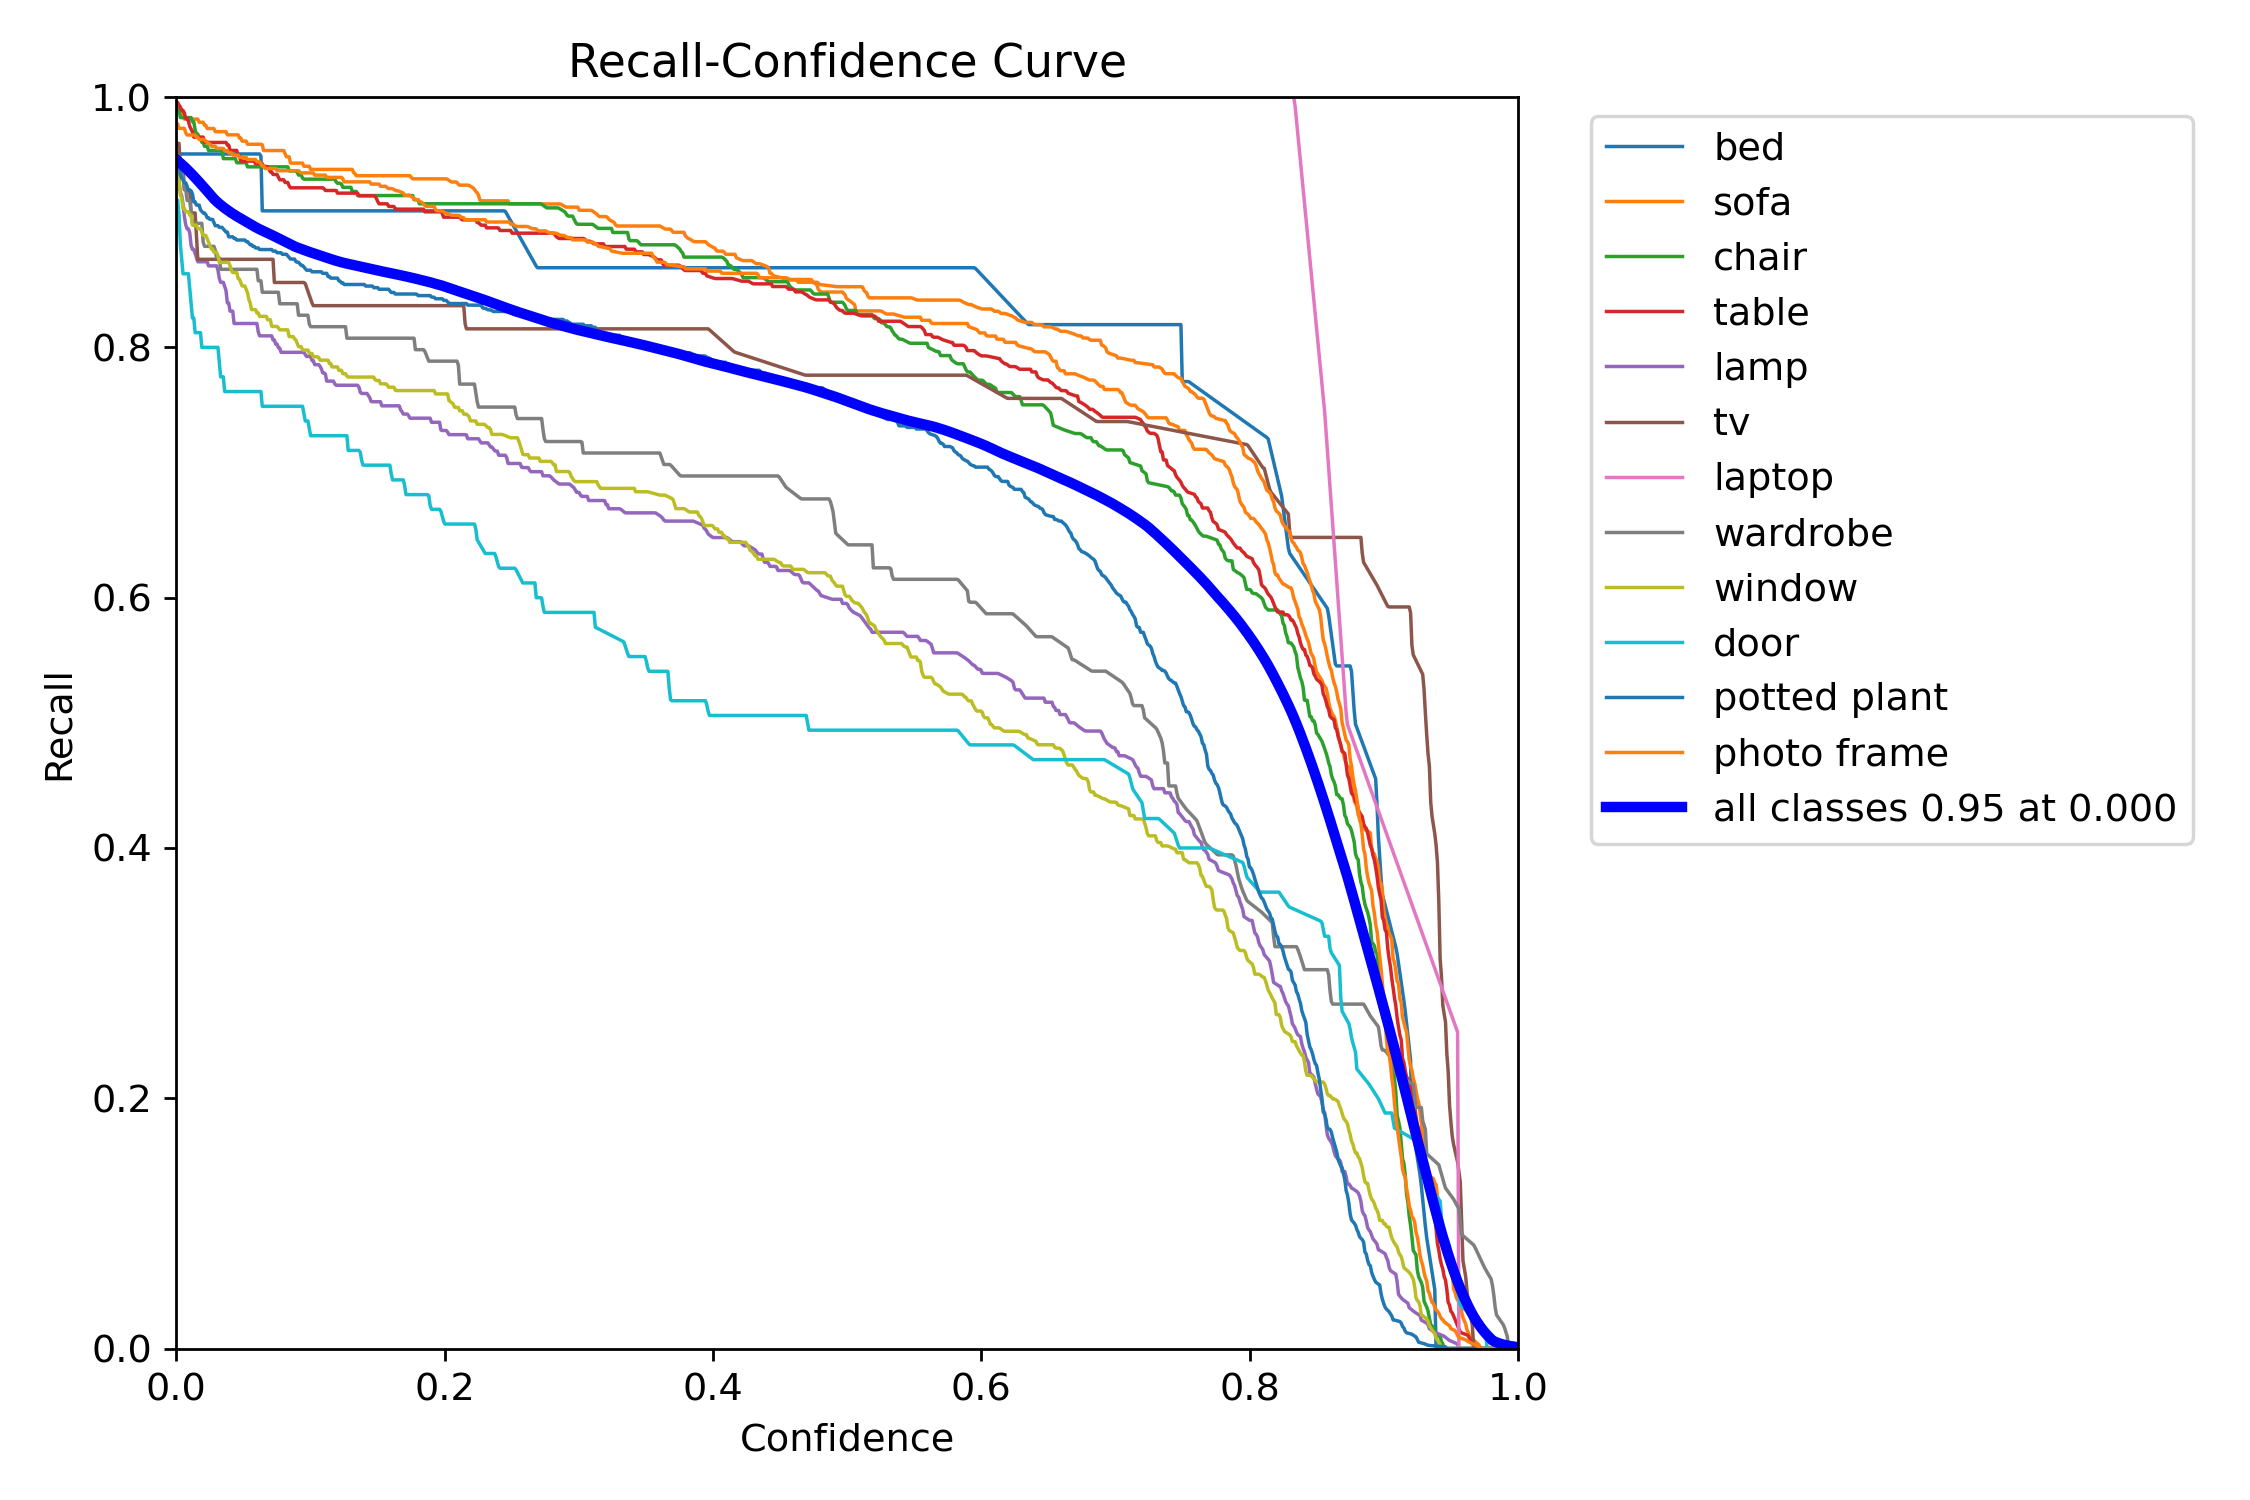


💾 Saving models...
✅ Best model: /kaggle/working/best.pt (38.64 MB)
✅ Last model: /kaggle/working/last.pt (38.64 MB)

🎉 All done! Download your models from the output section.
📁 Full results: /kaggle/working/runs/yolo11m_homeobjects3k_highperf/


In [2]:
# Step 6: Create YAML configuration
yaml_content = """path: /kaggle/working/datasets
train: images/train
val: images/val

names:
  0: bed
  1: sofa
  2: chair
  3: table
  4: lamp
  5: tv
  6: laptop
  7: wardrobe
  8: window
  9: door
  10: potted plant
  11: photo frame
"""

yaml_path = "/kaggle/working/HomeObjects-3K.yaml"
with open(yaml_path, "w") as f:
    f.write(yaml_content)
print(f"✅ YAML config created")

# Step 7: Load model
model = YOLO("yolo11m.pt")
print("✅ Model loaded")

# Step 8: Train with all callbacks disabled that might cause issues
print("🚀 Starting training...")

try:
    results = model.train(
        data=yaml_path,
        epochs=100,
        imgsz=768,
        batch=8,
        lr0=0.001,
        optimizer="SGD",
        patience=15,
        cos_lr=True,
        augment=True,
        device=0,
        project="/kaggle/working/runs",
        name="yolo11m_homeobjects3k_highperf",
        workers=2,
        pretrained=True,
        exist_ok=True,
        cache=False,
        plots=True,
        save=True,
        verbose=True
    )
    print("\n✅ Training completed successfully!")
    
except KeyboardInterrupt:
    print("\n⚠️ Training interrupted by user")
    # Load the last saved model
    model = YOLO("/kaggle/working/runs/yolo11m_homeobjects3k_highperf/weights/last.pt")
    
except Exception as e:
    print(f"\n❌ Training error: {e}")
    # Try to load last checkpoint if it exists
    last_pt = "/kaggle/working/runs/yolo11m_homeobjects3k_highperf/weights/last.pt"
    if os.path.exists(last_pt):
        print(f"⚠️ Loading last checkpoint from: {last_pt}")
        model = YOLO(last_pt)
    else:
        raise

# Step 9: Validate
print("\n📊 Running validation...")
try:
    metrics = model.val()
    print(f"\nmAP50-95: {metrics.box.map:.3f}")
    print(f"mAP50: {metrics.box.map50:.3f}")
    print(f"mAP75: {metrics.box.map75:.3f}")
except Exception as e:
    print(f"⚠️ Validation error: {e}")

# Step 10: Display results
print("\n📊 Displaying training results...")
try:
    from IPython.display import Image, display
    
    results_files = [
        ("Training Results", "results.png"),
        ("Confusion Matrix", "confusion_matrix.png"),
        ("F1 Curve", "F1_curve.png"),
        ("PR Curve", "PR_curve.png"),
        ("P Curve", "P_curve.png"),
        ("R Curve", "R_curve.png")
    ]
    
    base_path = "/kaggle/working/runs/yolo11m_homeobjects3k_highperf"
    
    for title, filename in results_files:
        filepath = f"{base_path}/{filename}"
        if os.path.exists(filepath):
            print(f"\n{title}:")
            display(Image(filename=filepath))
            
except Exception as e:
    print(f"⚠️ Could not display results: {e}")

# Step 11: Save models
print("\n💾 Saving models...")
best_weights = "/kaggle/working/runs/yolo11m_homeobjects3k_highperf/weights/best.pt"
last_weights = "/kaggle/working/runs/yolo11m_homeobjects3k_highperf/weights/last.pt"

if os.path.exists(best_weights):
    !cp {best_weights} /kaggle/working/best.pt
    size_mb = os.path.getsize(best_weights) / (1024**2)
    print(f"✅ Best model: /kaggle/working/best.pt ({size_mb:.2f} MB)")

if os.path.exists(last_weights):
    !cp {last_weights} /kaggle/working/last.pt
    size_mb = os.path.getsize(last_weights) / (1024**2)
    print(f"✅ Last model: /kaggle/working/last.pt ({size_mb:.2f} MB)")

print("\n🎉 All done! Download your models from the output section.")
print(f"📁 Full results: /kaggle/working/runs/yolo11m_homeobjects3k_highperf/")


image 1/1 /kaggle/working/datasets/images/val/living_room_1040.jpg: 768x576 1 chair, 1 table, 3 potted plants, 39.5ms
Speed: 3.6ms preprocess, 39.5ms inference, 1.5ms postprocess per image at shape (1, 3, 768, 576)


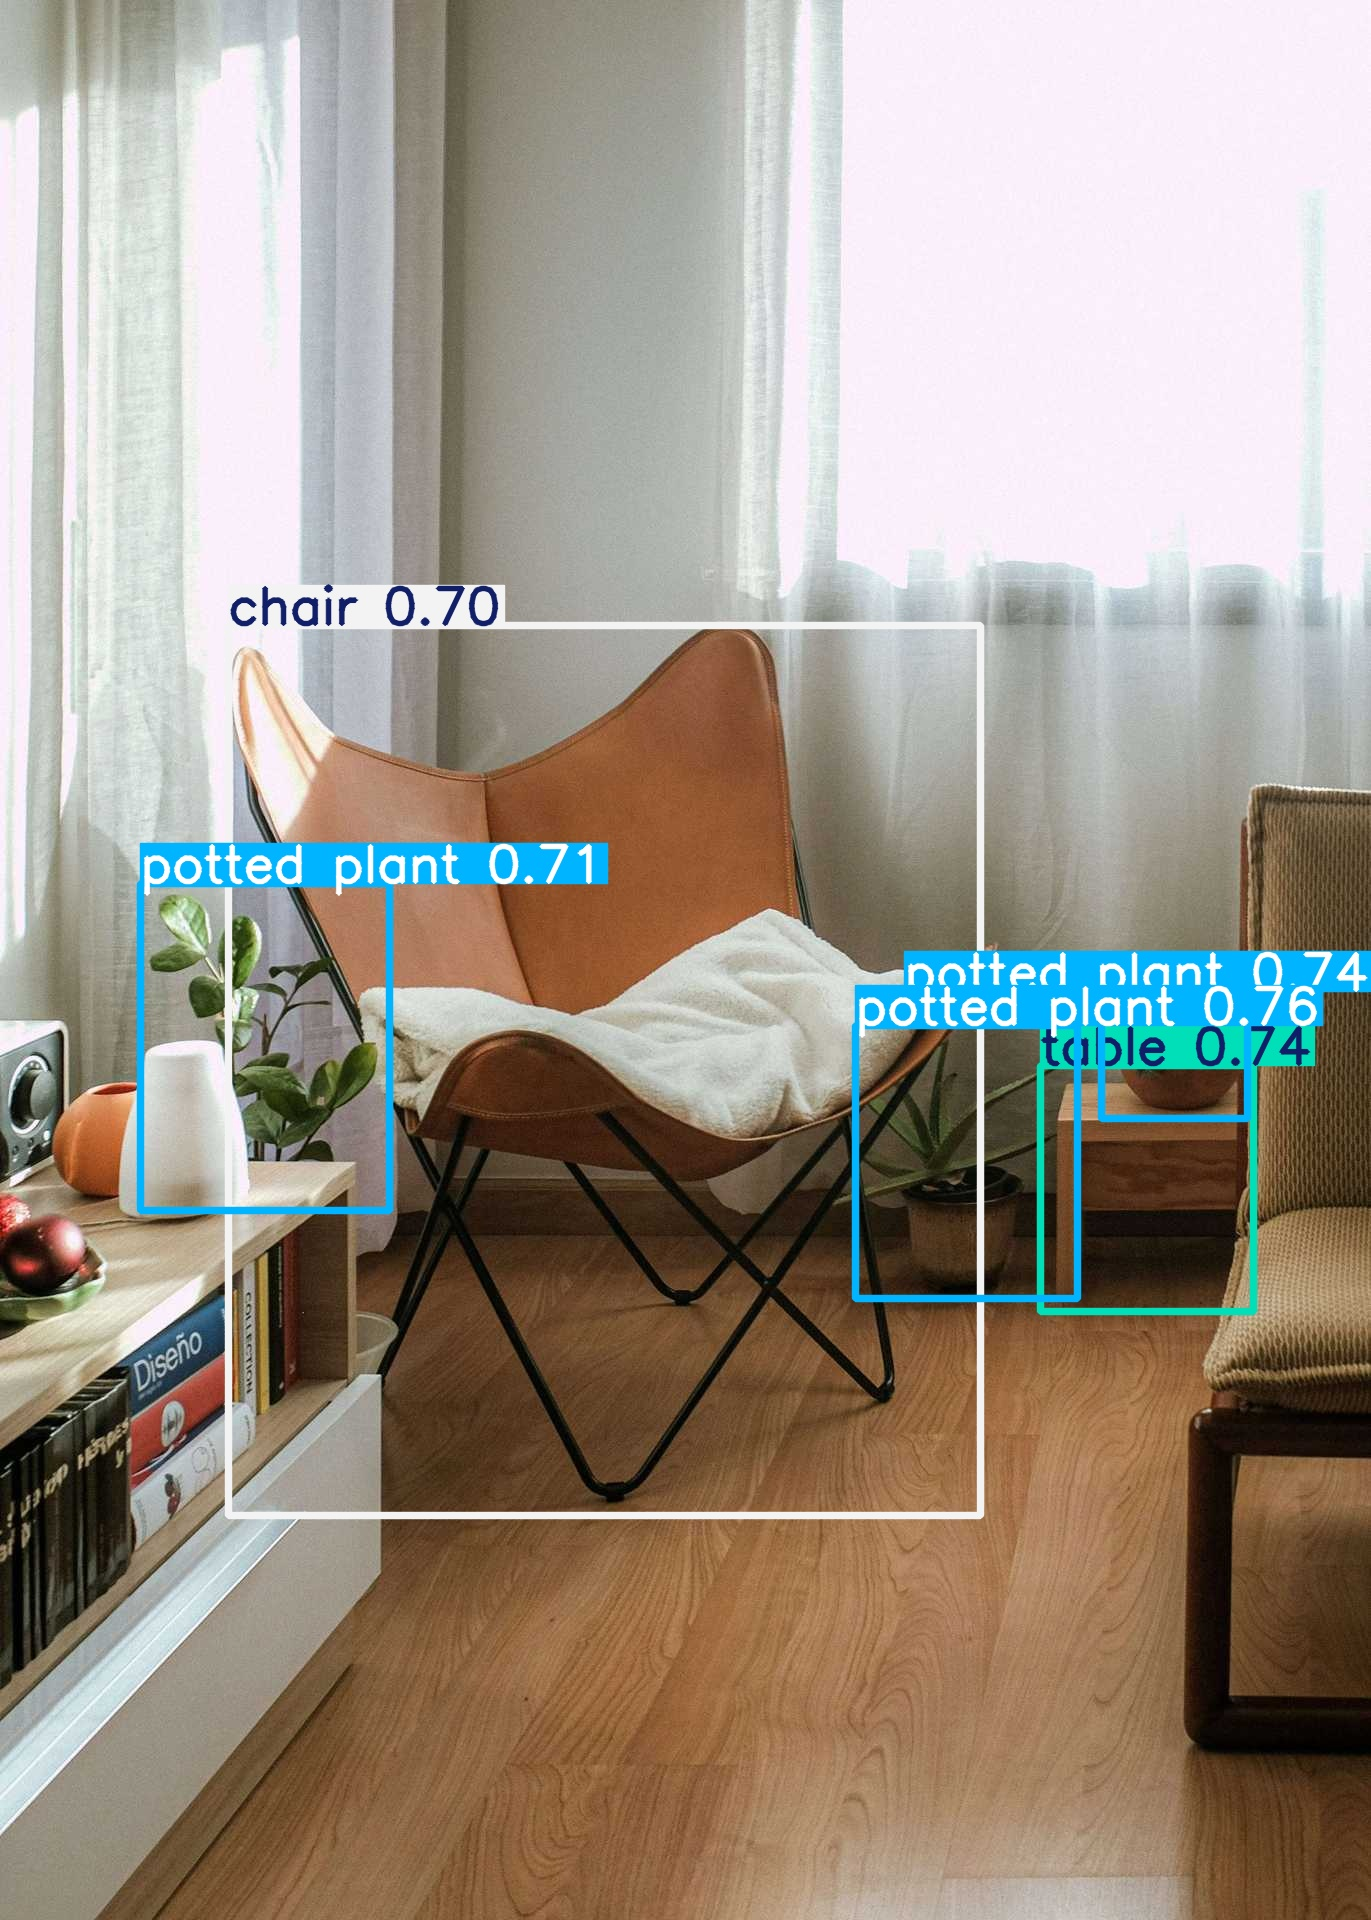


🔍 Detections for: /kaggle/working/datasets/images/val/living_room_1040.jpg
  • potted plant: 0.76
  • potted plant: 0.74
  • table: 0.74
  • potted plant: 0.71
  • chair: 0.70

Total objects detected: 5


In [6]:
from ultralytics import YOLO
from IPython.display import Image, display

# Load model once (outside function for efficiency)
model = YOLO('/kaggle/working/best.pt')

def test_image(image_path):
    """
    Test the YOLO model on a single image
    
    Args:
        image_path: Path to the image file
    """
    # Run detection
    results = model(image_path)
    
    # Save and display results
    results[0].save(filename='result.jpg')
    display(Image(filename='result.jpg'))
    
    # Print detections
    print(f"\n🔍 Detections for: {image_path}")
    for box in results[0].boxes:
        class_name = results[0].names[int(box.cls[0])]
        confidence = float(box.conf[0])
        print(f"  • {class_name}: {confidence:.2f}")
    
    print(f"\nTotal objects detected: {len(results[0].boxes)}")

# Test it!
test_image('/kaggle/working/datasets/images/val/living_room_1040.jpg')


image 1/1 /kaggle/working/datasets/images/val/living_room_119.jpg: 768x448 1 sofa, 1 lamp, 53.3ms
Speed: 4.2ms preprocess, 53.3ms inference, 1.7ms postprocess per image at shape (1, 3, 768, 448)


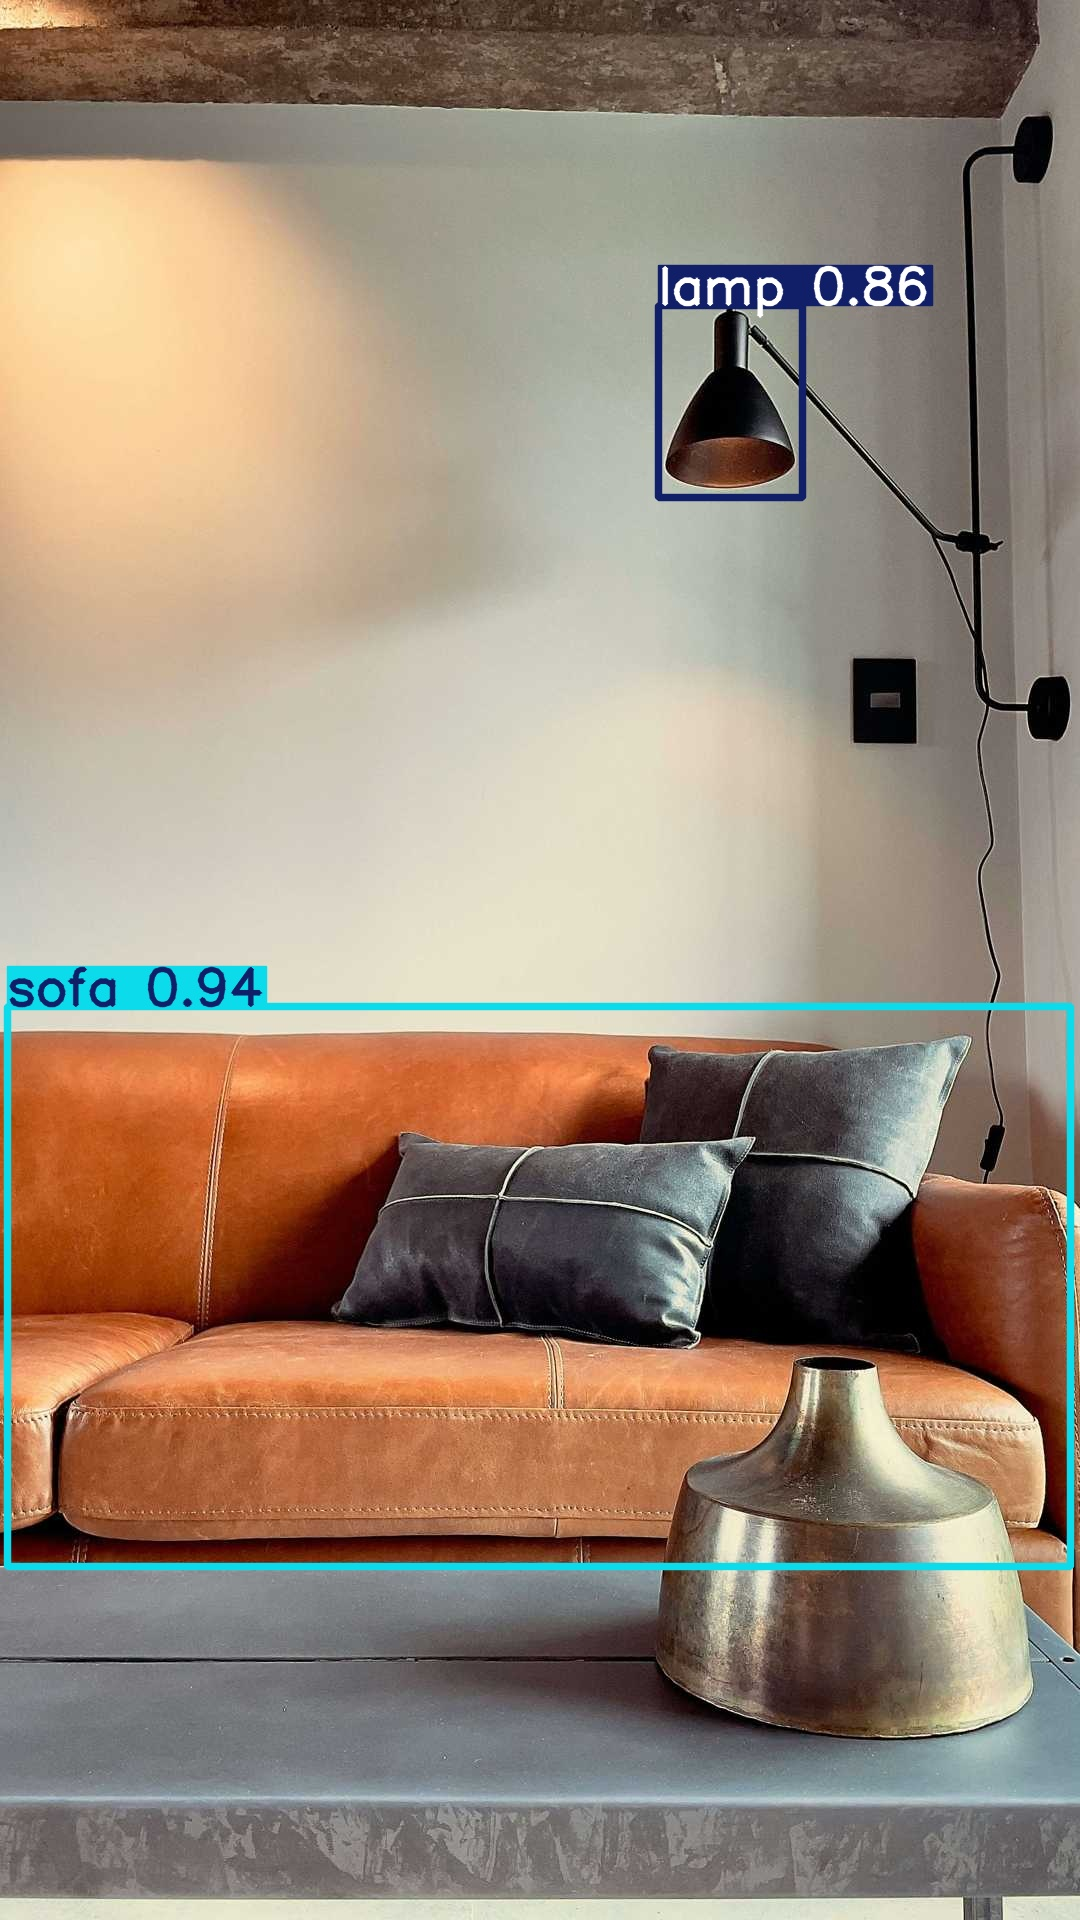


🔍 Detections for: /kaggle/working/datasets/images/val/living_room_119.jpg
  • sofa: 0.94
  • lamp: 0.86

Total objects detected: 2

image 1/1 /kaggle/working/datasets/images/val/living_room_1p (110).jpg: 544x768 2 sofas, 1 table, 1 window, 1 potted plant, 52.1ms
Speed: 5.0ms preprocess, 52.1ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 768)


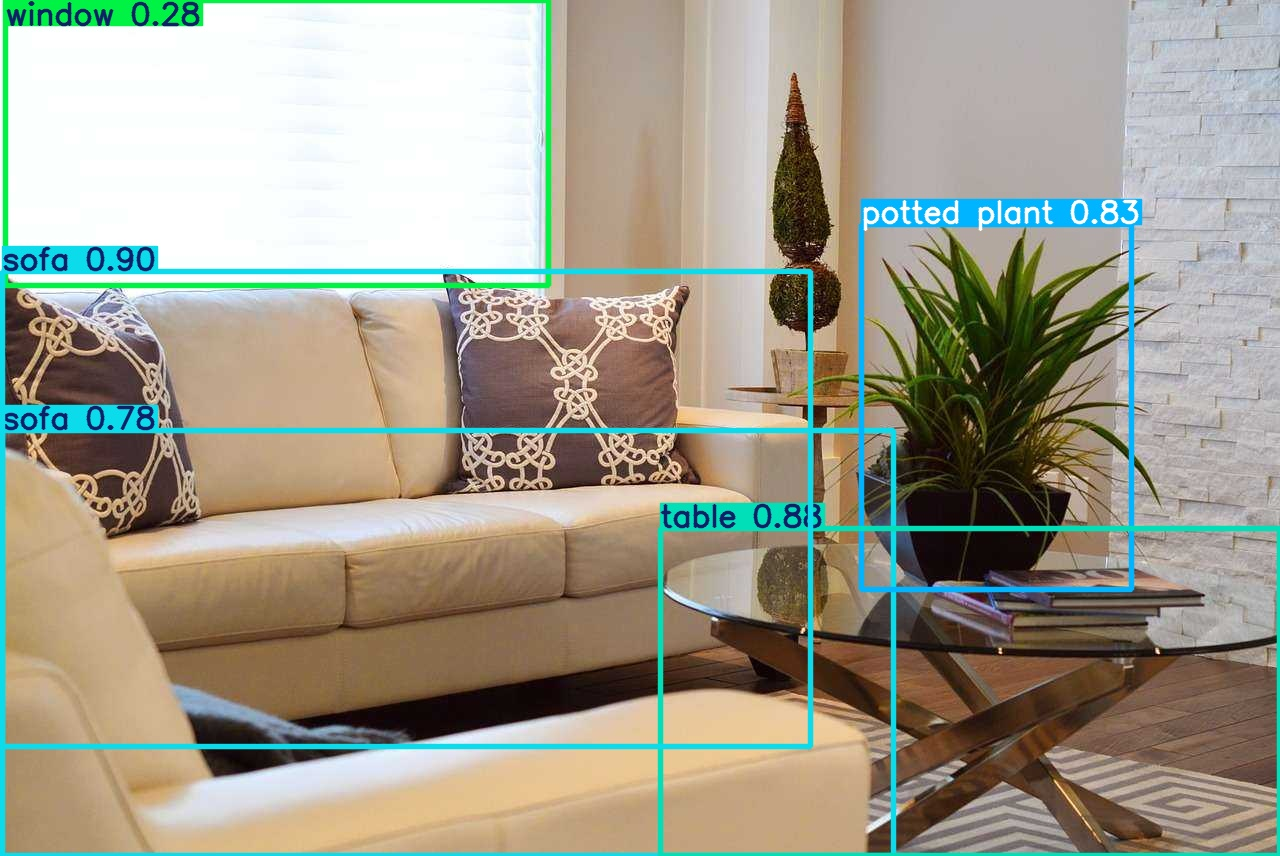


🔍 Detections for: /kaggle/working/datasets/images/val/living_room_1p (110).jpg
  • sofa: 0.90
  • table: 0.88
  • potted plant: 0.83
  • sofa: 0.78
  • window: 0.28

Total objects detected: 5

image 1/1 /kaggle/working/datasets/images/val/living_room_1p (131).jpg: 384x768 2 sofas, 4 chairs, 3 tables, 2 lamps, 2 wardrobes, 3 windows, 1 potted plant, 6 photo frames, 53.7ms
Speed: 2.2ms preprocess, 53.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 768)


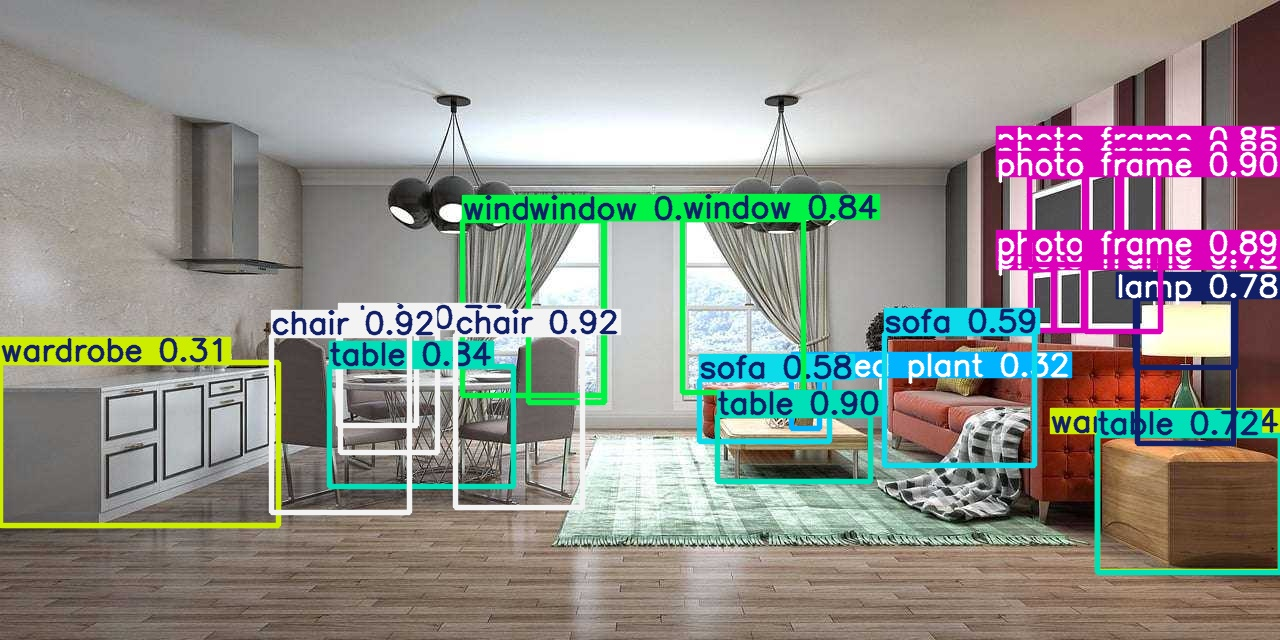


🔍 Detections for: /kaggle/working/datasets/images/val/living_room_1p (131).jpg
  • chair: 0.92
  • chair: 0.92
  • table: 0.90
  • photo frame: 0.90
  • photo frame: 0.89
  • photo frame: 0.88
  • photo frame: 0.85
  • table: 0.84
  • window: 0.84
  • photo frame: 0.79
  • lamp: 0.78
  • chair: 0.73
  • table: 0.72
  • chair: 0.65
  • sofa: 0.59
  • sofa: 0.58
  • window: 0.55
  • window: 0.51
  • wardrobe: 0.44
  • photo frame: 0.42
  • lamp: 0.40
  • potted plant: 0.32
  • wardrobe: 0.31

Total objects detected: 23


In [8]:
# Test multiple images
test_image('/kaggle/working/datasets/images/val/living_room_119.jpg')
test_image('/kaggle/working/datasets/images/val/living_room_1p (110).jpg')
test_image('/kaggle/working/datasets/images/val/living_room_1p (131).jpg')